# Differential gene expression analysis of germinating _M. polymorpha_ wild type and _gun1_ mutant spores grown in the presence or absence of spectinomycin

### Methods

_M. polymorpha_ spores were sterilised and plated on ½ Gamborg’s medium (Duchefa Biochemie) supplemented with 1.2 % agar and 500 μg⋅ml-1 spectinomycin (an inhibitor of plastid translation). The spores were germinated under long day conditions for 48 hours, after which they were resuspended in 1 ml of sterile water, transferred into a microcentrifuge tube and spun down at 6,000 rpm for 1 minute. The water was removed, and the spore pellet flash-frozen in liquid nitrogen. 

Extraction of total RNA from _Marchantia_ spores was carried out using the Direct-Zol RNA MINIprep kit (Zymo Research) following the manufacturer’s protocol. Three independent biological replicates were extracted for each line. RNA was quantified using a NanoDrop spectrophotometer (Thermo Fisher) and diluted to 250 ng⋅μl-1 before DNase treatment using Turbo DNase (Ambion) as recommended by the manufacturer. 

Transcriptome libraries of _M. polymorpha_ wild-type and _Mpgun1_ mutant spores were prepared using 200 ng of DNase-treated total RNA as a template for the TruSeq Stranded Total RNA kit with Ribo-Zero Plant (Illumina). The libraries were sequenced on an Illumina HiSeq 4000 platform (150 nt paired-end reads) at Novogene, Hong Kong. At least 5.7 GB raw data was obtained for each replicate library. Sequencing read data was deposited at the Short Read Archive database at the National Center for Biotechnology Information (NCBI) under project number PRJNA800059.

Optical duplicate reads were first removed with clumpify (parameters: dedupe optical dist = 40) from the bbmap package (https://sourceforge.net/projects/bbmap/) and adapters were trimmed with bbduk (parameters: ktrim=r k=23 mink=11 hdist=1 tpe tbo ftm=5). The reads were then assigned to transcripts using Salmon v1.3.0 (Patro et al., 2017) (parameters: -l A --validateMappings) against an index prepared with the _M. polymorpha_ MpTak_v6.1 reference genome and cDNA assemblies (https://marchantia.info/). Differential expression analyses were carried out using DESeq2 (Love et al., 2014). Functional annotations for MpTak_v5.1 genome release were used to annotate differentially expressed genes (log2 fold-change >1 or <-1 and padj < 0.01) and to identify _M. polymorpha_ photosynthesis-associated nuclear genes. 


References:
    
Patro R, Duggal G, Love MI, Irizarry RA, Kingsford C. 2017. Salmon provides fast and bias-aware quantification of transcript expression. Nature methods 14: 417–419.

Love MI, Huber W, Anders S. 2014. Moderated estimation of fold change and dispersion for RNA-seq data with DESeq2. Genome biology 15: 550.

In [63]:
pwd

'/Users/suvihonkanen/Desktop/GUN1 manuscript/Dryad'

In [6]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#read in the metadata as a sample_table
sample_table = pd.read_csv("mp_sample_table.txt", sep="\t")
sample_table.set_index('sample', inplace=True)
sample_table.head(12)

treatment genotype    geno_treat
sample                                 
M1       control       wt    control_wt
M2       control       wt    control_wt
M3       control       wt    control_wt
M4          spec       wt       spec_wt
M5          spec       wt       spec_wt
M6          spec       wt       spec_wt
M7       control     gun1  control_gun1
M8       control     gun1  control_gun1
M9       control     gun1  control_gun1
M10         spec     gun1     spec_gun1
M11         spec     gun1     spec_gun1
M12         spec     gun1     spec_gun1

In [7]:
ls

MpTak1_v5.1r2_func_annotation_1line.csv
Mpdata_spec.csv
WT_gun1_spores_spec.ipynb
mp_sample_table.txt


In [8]:
#read in the sequencing read counts table 
Mpdata = pd.read_csv('Mpdata_spec.csv')

#use the gene IDs as the row indexes
Mpdata.set_index('gene_ID',inplace=True)
Mpdata.head(10)

M1      M2     M3      M4      M5      M6     M7     M8     M9  \
gene_ID                                                                        
Mp1g00010  21079  150646  33836    3279    6389    5786   8263  16653  64172   
Mp1g00020      0       0      0       0       0       0      0      0      0   
Mp1g00030      0       0      0       0       0       0      0      0      0   
Mp1g00040      0       0      0       0       0       0      0      0      0   
Mp1g00050     18      83     15      17      23      16     17      3     43   
Mp1g00060  18021    8054  16909  373414  297826  147223  19345  11563   3400   
Mp1g00070   1081     515   1257      62      39      29   1710    596    411   
Mp1g00080  12538    5827  10946    6326    5012    4779  11002   3730   2583   
Mp1g00090    124      95    107     149     142     161    122    123     42   
Mp1g00100    345     180    371     284     196     176    295    657     81   

             M10     M11     M12  
gene_ID                           
Mp1g00010  12498   36078    2808  
Mp1g00020      0       0       0  
Mp1g00030      0       0       0  
Mp1g00040      0       0       0  
Mp1g00050     12      24      26  
Mp1g00060  59159  143019  174330  
Mp1g00070     22      31      42  
Mp1g00080   1055    2720    3813  
Mp1g00090    166     138     212  
Mp1g00100    614     439     299

In [9]:
print(len(Mpdata))

19320


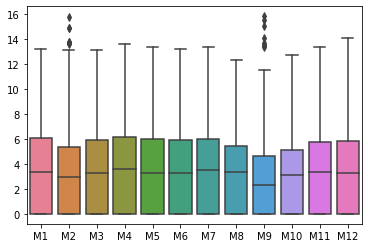

In [10]:
#plot the distribution of counts in each sample - plotting log(counts+1) makes it easier
#the +1 is to avoid dividing by zero

fig, ax = plt.subplots(1,1, figsize=(6,4))
#boxplots show the median (horizontal line), the interquartile range (coloured box),
#and 'whiskers' which by default extend 1.5x the IQR in each direction
sns.boxplot(data=np.log(Mpdata+1),palette='husl',ax=ax)
ax.set_xticklabels(ax.get_xticklabels());

In [72]:
#prefilter data to retain all transcripts with at least 10 counts in at least one sample
prefiltered_Mpdata = Mpdata[Mpdata.max(axis=1) > 10]

#check the number of transcripts included before and after filtering
print(len(Mpdata))
print(len(prefiltered_Mpdata))

prefiltered_Mpdata.head(10)

19320
12296


M1      M2     M3      M4      M5      M6     M7     M8     M9  \
gene_ID                                                                        
Mp1g00010  21079  150646  33836    3279    6389    5786   8263  16653  64172   
Mp1g00050     18      83     15      17      23      16     17      3     43   
Mp1g00060  18021    8054  16909  373414  297826  147223  19345  11563   3400   
Mp1g00070   1081     515   1257      62      39      29   1710    596    411   
Mp1g00080  12538    5827  10946    6326    5012    4779  11002   3730   2583   
Mp1g00090    124      95    107     149     142     161    122    123     42   
Mp1g00100    345     180    371     284     196     176    295    657     81   
Mp1g00110    286     102    173     251     196     157    240    125     47   
Mp1g00120    575     302    547     542     387     407    693    294    162   
Mp1g00140    844     460    848     751     623     453    658    773    216   

             M10     M11     M12  
gene_ID                           
Mp1g00010  12498   36078    2808  
Mp1g00050     12      24      26  
Mp1g00060  59159  143019  174330  
Mp1g00070     22      31      42  
Mp1g00080   1055    2720    3813  
Mp1g00090    166     138     212  
Mp1g00100    614     439     299  
Mp1g00110     92     189     197  
Mp1g00120    148     339     439  
Mp1g00140    511     651     544

In [74]:
#run DEseq2 differential gene expression analysis

from diffexpr.py_deseq import py_DESeq2

dds = py_DESeq2(count_matrix = prefiltered_Mpdata.reset_index(),
               design_matrix = sample_table,
               design_formula = '~ geno_treat', #telling DESeq2 which factors to take into account
               gene_column = 'gene_ID') #telling DESeq2 this should be the gene ID column
  
dds.run_deseq()  

In [75]:
normalized_Mpdata = dds.normalized_count().set_index('gene_ID')
normalized_Mpdata.head()


INFO:DESeq2:Normalizing counts


M1             M2            M3             M4  \
gene_ID                                                               
Mp1g00010  14214.908964  202562.656501  26258.733870    1991.800567   
Mp1g00050     12.138544     111.604029     11.640886      10.326505   
Mp1g00060  12152.705273   10829.624653  13122.382404  226827.147610   
Mp1g00070    728.986982     692.482828    975.506220      37.661371   
Mp1g00080   8455.170008    7835.140657   8494.742314    3842.674714   

                      M5             M6            M7            M8  \
gene_ID                                                               
Mp1g00010    4789.146399    4812.398211   5764.525806  20373.117691   
Mp1g00050      17.240627      13.307703     11.859729      3.670171   
Mp1g00060  223248.132033  122450.000318  13495.673693  14146.061362   
Mp1g00070      29.234107      24.120212   1192.949187    729.140584   
Mp1g00080    3756.957545    3974.844634   7675.337398   4563.245601   

                      M9            M10            M11            M12  
gene_ID                                                                
Mp1g00010  184405.860733   21285.250979   34469.883880    2498.745008  
Mp1g00050     123.565605      20.437111      22.930240      23.136528  
Mp1g00060    9770.303660  100753.253536  136644.168819  155130.419221  
Mp1g00070    1181.057295      37.468037      29.618227      37.374391  
Mp1g00080    7422.557163    1796.762665    2598.760579    3393.060796

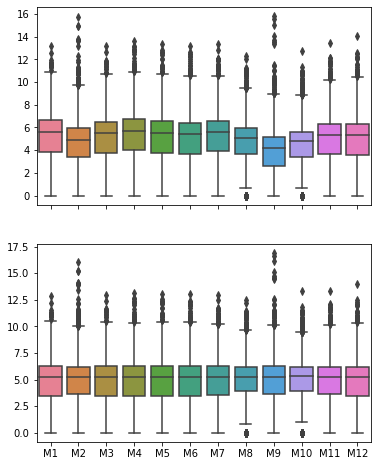

In [76]:
#compare the counts before and after normalization
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(6,8), sharex=True)
sns.boxplot(data=np.log(prefiltered_Mpdata+1),palette='husl',ax=ax1)
sns.boxplot(data=np.log(normalized_Mpdata+1),palette='husl',ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels());

In [79]:
#carry out principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(np.log(normalized_Mpdata+1).T)
principalDf = pd.DataFrame(data = principalComponents, index = sample_table.geno_treat, columns = ['pc1', 'pc2'])
principalDf.head(12)

pc1        pc2
geno_treat                        
control_wt    41.201067 -25.220666
control_wt    57.462890 -16.781310
control_wt    46.692350 -15.160436
spec_wt      -48.197155 -14.646922
spec_wt      -41.318700 -54.519353
spec_wt      -40.912697 -50.467527
control_gun1  44.687343  12.393061
control_gun1  26.163619  51.220637
control_gun1  62.689527  10.691865
spec_gun1    -44.555297  56.957118
spec_gun1    -49.655091  28.682968
spec_gun1    -54.257857  16.850566

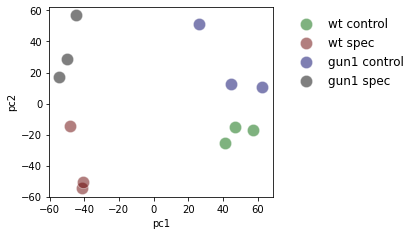

In [80]:
palette = {"control_wt":"#006600","spec_wt":"#660000","control_gun1":"#000066","spec_gun1":"#000000"}

fig, ax = plt.subplots(1,1, figsize=(4,3.5))
genotype = sample_table.geno_treat.unique()
for geno_treat in genotype:
    sns.scatterplot(principalDf.loc[geno_treat, 'pc1'],principalDf.loc[geno_treat, 'pc2'],s=150,color=palette[geno_treat], alpha=0.5)
# Put the legend out of the figure
ax.legend(['wt control', 'wt spec', 'gun1 control', 'gun1 spec'], bbox_to_anchor=(1.05 , 1), loc=2, frameon=False, fontsize='large')


PC1 separates spec and control treatments, PC2 separates wt and _gun1_ mutant genotypes. 

In [81]:
#check the percentage of variance that is explained by each of the components

print(pca.explained_variance_ratio_)

[0.43577827 0.22888749]


In [82]:
logncounts = np.log(normalized_Mpdata+1)
logncounts.head(10)

M1         M2         M3         M4         M5         M6  \
gene_ID                                                                      
Mp1g00010  9.562117  12.218809  10.175792   7.597296   8.474316   8.479159   
Mp1g00050  2.575550   4.723877   2.536936   2.427146   2.903651   2.660798   
Mp1g00060  9.405389   9.290133   9.482151  12.331948  12.316044  11.715466   
Mp1g00070  6.593027   6.541726   6.883981   3.654841   3.408971   3.223673   
Mp1g00080  9.042652   8.966502   9.047320   8.254184   8.231631   8.287992   
Mp1g00090  4.438183   4.857791   4.431273   4.516435   4.676952   4.904599   
Mp1g00100  5.453847   5.493197   5.666143   5.156255   4.996672   4.993046   
Mp1g00110  5.267177   4.928354   4.907186   5.033491   4.996672   4.879629   
Mp1g00120  5.962960   6.009003   6.053275   5.799799   5.673640   5.827517   
Mp1g00140  6.345922   6.428958   6.490872   6.125096   6.148460   5.934297   

                 M7        M8         M9        M10        M11        M12  
gene_ID                                                                    
Mp1g00010  8.659652  9.922021  12.124900   9.965817  10.447870   7.823944  
Mp1g00050  2.554101  1.541196   4.824833   3.065124   3.175143   3.183726  
Mp1g00060  9.510199  9.557262   9.187205  11.520440  11.825143  11.952028  
Mp1g00070  7.085022  6.593237   7.075012   3.649828   3.421595   3.647390  
Mp1g00080  8.945898  8.426009   8.912414   7.494298   7.863175   8.129782  
Mp1g00090  4.455637  5.020434   4.801493   5.647964   4.889212   5.245189  
Mp1g00100  5.331758  6.690553   5.454308   6.953397   6.041284   5.587511  
Mp1g00110  5.126529  5.036458   4.913097   5.060596   5.201672   5.172208  
Mp1g00120  6.183031  5.887982   6.145314   5.533618   5.783486   5.970372  
Mp1g00140  6.131316  6.852962   6.432460   6.769964   6.434519   6.184329

In [83]:
#do a specific test for differences
#the 'contrast' consists of a factor, the level of interest and the level of reference
dds.get_deseq_result(contrast = ['geno_treat','spec_wt','control_wt'])
res_spec_vs_control_wt = dds.deseq_result.set_index('gene_ID') 
res_spec_vs_control_wt.head(30)

# baseMean = average normalised expression
# log2FoldChange = log2expression wt spec/wt control
# lfcSE = uncertainty (standard error) in lfc
# statistic
# pvalue
# padj = pvalue adjusted for multiple testing

INFO:DESeq2:Using contrast: ['geno_treat', 'spec_wt', 'control_wt']


baseMean  log2FoldChange     lfcSE       stat        pvalue  \
gene_ID                                                                      
Mp1g00010  43618.919051       -4.389804  1.256631  -3.493313  4.770670e-04   
Mp1g00050     31.821473       -1.715428  0.999706  -1.715932  8.617458e-02   
Mp1g00060  86547.489382        3.987036  0.262206  15.205752  3.238889e-52   
Mp1g00070    474.633287       -4.708340  0.287545 -16.374260  2.920376e-60   
Mp1g00080   5317.437839       -1.098573  0.249946  -4.395240  1.106504e-05   
Mp1g00090    132.062712        0.176279  0.351218   0.501908  6.157322e-01   
Mp1g00100    350.163109       -0.711017  0.507079  -1.402182  1.608610e-01   
Mp1g00110    155.185590       -0.116431  0.229118  -0.508171  6.113336e-01   
Mp1g00120    370.953412       -0.346903  0.208556  -1.663360  9.624045e-02   
Mp1g00140    595.626854       -0.505284  0.284836  -1.773945  7.607232e-02   
Mp1g00160    521.432241       -0.353043  0.291501  -1.211119  2.258496e-01   
Mp1g00170    178.714712        1.199106  0.261794   4.580343  4.642144e-06   
Mp1g00180     19.976336        2.908868  0.766124   3.796865  1.465375e-04   
Mp1g00190    162.226834        0.737726  0.237497   3.106251  1.894758e-03   
Mp1g00220    457.612499       -0.102172  0.181879  -0.561757  5.742814e-01   
Mp1g00230    934.983975       -0.042008  0.171588  -0.244820  8.065955e-01   
Mp1g00240      5.966286        1.517114  1.376176   1.102413  2.702822e-01   
Mp1g00250   1542.983240       -0.036235  0.216908  -0.167050  8.673306e-01   
Mp1g00270    147.153757       -1.000362  0.313031  -3.195730  1.394775e-03   
Mp1g00290    234.098374       -0.634702  0.265708  -2.388717  1.690731e-02   
Mp1g00310      4.800577       -0.175825  1.046973  -0.167937  8.666331e-01   
Mp1g00320     77.268481       -0.107330  0.325357  -0.329884  7.414874e-01   
Mp1g00330    204.328372       -4.077995  0.508524  -8.019278  1.063689e-15   
Mp1g00340    199.020085        0.054976  0.214162   0.256701  7.974093e-01   
Mp1g00360   1025.807211       -0.120598  0.267092  -0.451523  6.516124e-01   
Mp1g00370    288.584021        0.646300  0.194007   3.331316  8.643641e-04   
Mp1g00380    396.507047        0.278041  0.318073   0.874143  3.820404e-01   
Mp1g00400    189.869336        0.455334  0.303501   1.500273  1.335437e-01   
Mp1g00410      5.757735        0.358756  1.092068   0.328510  7.425259e-01   
Mp1g00420    779.183526        0.460845  0.188928   2.439256  1.471752e-02   

                   padj  
gene_ID                  
Mp1g00010  2.564445e-03  
Mp1g00050  1.878034e-01  
Mp1g00060  1.521406e-49  
Mp1g00070  2.229160e-57  
Mp1g00080  9.075711e-05  
Mp1g00090  7.451565e-01  
Mp1g00100  2.982534e-01  
Mp1g00110  7.410006e-01  
Mp1g00120  2.048065e-01  
Mp1g00140  1.705657e-01  
Mp1g00160  3.791480e-01  
Mp1g00170  4.099386e-05  
Mp1g00180  9.098435e-04  
Mp1g00190  8.405623e-03  
Mp1g00220  7.148083e-01  
Mp1g00230  8.795122e-01  
Mp1g00240  4.302041e-01  
Mp1g00250  9.176738e-01  
Mp1g00270  6.467118e-03  
Mp1g00290  5.207793e-02  
Mp1g00310  9.174127e-01  
Mp1g00320  8.351735e-01  
Mp1g00330  3.618615e-14  
Mp1g00340  8.733512e-01  
Mp1g00360  7.726352e-01  
Mp1g00370  4.299991e-03  
Mp1g00380  5.460479e-01  
Mp1g00400  2.608299e-01  
Mp1g00410  8.359362e-01  
Mp1g00420  4.659022e-02

In [84]:
#sort the results
res_spec_vs_control_wt = res_spec_vs_control_wt.sort_values(by='padj',ascending=True)
res_spec_vs_control_wt.head(30)

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
gene_ID                                                                      
Mp4g05970   4802.533402       -3.544838  0.192002 -18.462461  4.140360e-76   
Mp3g22100    384.418082       -5.053855  0.275802 -18.324228  5.302881e-75   
Mp1g18500    412.578352       -5.289404  0.288835 -18.312888  6.531245e-75   
Mp2g11020    645.797612       -3.974236  0.217349 -18.285031  1.089019e-74   
Mp1g05620   3211.256596        3.909404  0.216675  18.042746  8.996095e-73   
Mp5g22460   1251.092344       -8.229239  0.459065 -17.926073  7.381310e-72   
Mp2g17480   1227.400919       -8.086434  0.458935 -17.620016  1.729557e-69   
Mp1g17650    455.650227       -4.678265  0.267715 -17.474821  2.228454e-68   
Mp8g16870    774.831366       -4.345711  0.254787 -17.056283  3.139030e-65   
Mp7g10730   1143.147910       -8.667542  0.508353 -17.050235  3.481301e-65   
Mp6g03190    314.137767       -5.793416  0.340944 -16.992261  9.370617e-65   
Mp3g13710    519.656895       -6.894219  0.406208 -16.972157  1.319940e-64   
Mp8g16590    349.610792       -6.019303  0.357974 -16.814924  1.897354e-63   
Mp4g06030  28359.206836       -3.042671  0.184086 -16.528556  2.285527e-61   
Mp2g02600    399.379385       -4.177321  0.254584 -16.408447  1.664068e-60   
Mp1g00070    474.633287       -4.708340  0.287545 -16.374260  2.920376e-60   
Mp7g18030    882.765894       -6.931211  0.424743 -16.318586  7.280239e-60   
Mp3g03620   2848.078633        6.749210  0.422614  15.970160  2.062565e-57   
Mp2g17030    497.957827       -8.568120  0.537901 -15.928809  3.999008e-57   
Mp8g00330   1924.928112        6.976247  0.438014  15.926984  4.117442e-57   
Mp2g18290    341.190942       -6.924463  0.437412 -15.830541  1.915677e-56   
Mpzg00730  21344.982043        3.483433  0.222955  15.623920  5.003264e-55   
Mp2g00850   1587.963702       -3.314008  0.212600 -15.587975  8.787565e-55   
Mp4g05960   7623.241108       -2.913206  0.188379 -15.464612  6.013467e-54   
Mp3g15760    385.226310       -6.956485  0.450173 -15.452908  7.211559e-54   
Mp1g00060  86547.489382        3.987036  0.262206  15.205752  3.238889e-52   
Mp6g04090    823.768488        5.416675  0.356313  15.202017  3.428964e-52   
Mpzg00740  41117.619986        3.858973  0.254298  15.174977  5.179557e-52   
Mp7g03960    846.891262       -4.733049  0.313978 -15.074478  2.383911e-51   
Mp1g05610    204.496616        5.949947  0.395664  15.037867  4.147002e-51   

                   padj  
gene_ID                  
Mp4g05970  5.056622e-72  
Mp3g22100  2.658870e-71  
Mp1g18500  2.658870e-71  
Mp2g11020  3.325046e-71  
Mp1g05620  2.197386e-69  
Mp5g22460  1.502466e-68  
Mp2g17480  3.017584e-66  
Mp1g17650  3.402013e-65  
Mp8g16870  4.251713e-62  
Mp7g10730  4.251713e-62  
Mp6g03190  1.040394e-61  
Mp3g13710  1.343369e-61  
Mp8g16590  1.782491e-60  
Mp4g06030  1.993795e-58  
Mp2g02600  1.354884e-57  
Mp1g00070  2.229160e-57  
Mp7g18030  5.230209e-57  
Mp3g03620  1.399451e-54  
Mp2g17030  2.514316e-54  
Mp8g00330  2.514316e-54  
Mp2g18290  1.114103e-53  
Mpzg00730  2.777494e-52  
Mp2g00850  4.666197e-52  
Mp4g05960  3.060103e-51  
Mp3g15760  3.522991e-51  
Mp1g00060  1.521406e-49  
Mp6g04090  1.551035e-49  
Mpzg00740  2.259212e-49  
Mp7g03960  1.003955e-48  
Mp1g05610  1.688244e-48

In [85]:
#check the number of up and down regulated genes using thresholds padj < 0.01 && log2fc > 1 or < -1

print(len(res_spec_vs_control_wt[(res_spec_vs_control_wt.log2FoldChange > 1) & (res_spec_vs_control_wt.padj < 0.01)]))
print(len(res_spec_vs_control_wt[(res_spec_vs_control_wt.log2FoldChange < -1) & (res_spec_vs_control_wt.padj < 0.01)]))

1089
1042


In [86]:
#filter the results to retain those with padj < 0.01 && log2fc > 1 or < -1
spec_vs_control_wt_dif1 = res_spec_vs_control_wt[(res_spec_vs_control_wt.log2FoldChange > 1) & (res_spec_vs_control_wt.padj < 0.01)] 
spec_vs_control_wt_dif2 = res_spec_vs_control_wt[(res_spec_vs_control_wt.log2FoldChange < -1) & (res_spec_vs_control_wt.padj < 0.01)] 
spec_vs_control_wt_dif = pd.concat([spec_vs_control_wt_dif1, spec_vs_control_wt_dif2], axis=0)
spec_vs_control_wt_dif = spec_vs_control_wt_dif.sort_values(by='padj',ascending=True)
spec_vs_control_wt_dif

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
gene_ID                                                                     
Mp4g05970  4802.533402       -3.544838  0.192002 -18.462461  4.140360e-76   
Mp3g22100   384.418082       -5.053855  0.275802 -18.324228  5.302881e-75   
Mp1g18500   412.578352       -5.289404  0.288835 -18.312888  6.531245e-75   
Mp2g11020   645.797612       -3.974236  0.217349 -18.285031  1.089019e-74   
Mp1g05620  3211.256596        3.909404  0.216675  18.042746  8.996095e-73   
...                ...             ...       ...        ...           ...   
Mp4g13330    38.692521        1.422696  0.466293   3.051074  2.280245e-03   
Mp4g19770    10.861589        2.266200  0.742823   3.050796  2.282359e-03   
Mp4g14760   110.165108        1.103591  0.361915   3.049314  2.293650e-03   
Mp6g12730  4966.419652        1.154015  0.378615   3.047987  2.303799e-03   
Mp7g03270    44.212068        1.199366  0.393703   3.046371  2.316221e-03   

                   padj  
gene_ID                  
Mp4g05970  5.056622e-72  
Mp3g22100  2.658870e-71  
Mp1g18500  2.658870e-71  
Mp2g11020  3.325046e-71  
Mp1g05620  2.197386e-69  
...                 ...  
Mp4g13330  9.843984e-03  
Mp4g19770  9.849631e-03  
Mp4g14760  9.884383e-03  
Mp6g12730  9.917624e-03  
Mp7g03270  9.960566e-03  

[2131 rows x 6 columns]

In [99]:
# do a specific test for differences
# the 'contrast' consists of a factor, the level of interest and the level of reference
dds.get_deseq_result(contrast = ['geno_treat','spec_gun1','control_gun1'])
res_spec_vs_control_gun1 = dds.deseq_result.set_index('gene_ID') 
res_spec_vs_control_gun1.head(30)

# baseMean = average normalised expression
# log2FoldChange = log2expression gun1 spec/ gun1 control
# lfcSE = uncertainty (standard error) in lfc
# statistic
# pvalue
# padj = pvalue adjusted for multiple testing

INFO:DESeq2:Using contrast: ['geno_treat', 'spec_gun1', 'control_gun1']


baseMean  log2FoldChange     lfcSE       stat        pvalue  \
gene_ID                                                                      
Mp1g00010  43618.919051       -1.853657  1.256596  -1.475142  1.401744e-01   
Mp1g00050     31.821473       -1.016160  1.004417  -1.011691  3.116859e-01   
Mp1g00060  86547.489382        3.390924  0.262280  12.928657  3.101887e-38   
Mp1g00070    474.633287       -4.899108  0.298802 -16.395844  2.047781e-60   
Mp1g00080   5317.437839       -1.334686  0.250496  -5.328180  9.920196e-08   
Mp1g00090    132.062712        0.759522  0.353884   2.146245  3.185343e-02   
Mp1g00100    350.163109        0.473013  0.505382   0.935951  3.492987e-01   
Mp1g00110    155.185590        0.158609  0.237195   0.668686  5.036955e-01   
Mp1g00120    370.953412       -0.427861  0.212813  -2.010500  4.437830e-02   
Mp1g00140    595.626854       -0.038054  0.285976  -0.133066  8.941414e-01   
Mp1g00160    521.432241       -0.551417  0.295278  -1.867450  6.183877e-02   
Mp1g00170    178.714712        0.820981  0.268057   3.062709  2.193429e-03   
Mp1g00180     19.976336        1.719854  0.658391   2.612206  8.996001e-03   
Mp1g00190    162.226834        0.750294  0.247766   3.028243  2.459799e-03   
Mp1g00220    457.612499        0.230541  0.185091   1.245553  2.129284e-01   
Mp1g00230    934.983975        0.282973  0.174856   1.618324  1.055928e-01   
Mp1g00240      5.966286        0.809267  1.396922   0.579322  5.623721e-01   
Mp1g00250   1542.983240        0.009513  0.218828   0.043471  9.653265e-01   
Mp1g00270    147.153757       -0.347128  0.322417  -1.076644  2.816392e-01   
Mp1g00290    234.098374       -0.109126  0.273223  -0.399404  6.895954e-01   
Mp1g00310      4.800577        1.695114  1.200804   1.411649  1.580532e-01   
Mp1g00320     77.268481        0.065165  0.345008   0.188880  8.501868e-01   
Mp1g00330    204.328372       -3.473313  0.497277  -6.984664  2.855381e-12   
Mp1g00340    199.020085        0.241021  0.223993   1.076020  2.819182e-01   
Mp1g00360   1025.807211       -0.409048  0.277019  -1.476605  1.397814e-01   
Mp1g00370    288.584021        0.661258  0.199262   3.318539  9.048967e-04   
Mp1g00380    396.507047       -0.078984  0.327130  -0.241444  8.092110e-01   
Mp1g00400    189.869336        0.485982  0.309508   1.570175  1.163743e-01   
Mp1g00410      5.757735        0.023231  1.158262   0.020057  9.839983e-01   
Mp1g00420    779.183526       -0.438400  0.192534  -2.277004  2.278596e-02   

                   padj  
gene_ID                  
Mp1g00010  2.833417e-01  
Mp1g00050  4.950090e-01  
Mp1g00060  6.887881e-36  
Mp1g00070  4.168258e-57  
Mp1g00080  1.272640e-06  
Mp1g00090  9.199006e-02  
Mp1g00100  5.325159e-01  
Mp1g00110  6.723832e-01  
Mp1g00120  1.188579e-01  
Mp1g00140  9.412332e-01  
Mp1g00160  1.535659e-01  
Mp1g00170  1.015480e-02  
Mp1g00180  3.306032e-02  
Mp1g00190  1.118865e-02  
Mp1g00220  3.840069e-01  
Mp1g00230  2.302866e-01  
Mp1g00240  7.196348e-01  
Mp1g00250  9.809895e-01  
Mp1g00270  4.622578e-01  
Mp1g00290  8.112235e-01  
Mp1g00310  3.100890e-01  
Mp1g00320  9.153956e-01  
Mp1g00330  7.032077e-11  
Mp1g00340  4.625913e-01  
Mp1g00360  2.832289e-01  
Mp1g00370  4.704770e-03  
Mp1g00380  8.904648e-01  
Mp1g00400  2.469214e-01  
Mp1g00410  9.924355e-01  
Mp1g00420  7.063070e-02

In [100]:
res_spec_vs_control_gun1 = res_spec_vs_control_gun1.sort_values(by='padj',ascending=True)

In [101]:
spec_vs_control_gun1_dif1 = res_spec_vs_control_gun1[(res_spec_vs_control_gun1.log2FoldChange > 1) & (res_spec_vs_control_gun1.padj < 0.01)] 
spec_vs_control_gun1_dif2 = res_spec_vs_control_gun1[(res_spec_vs_control_gun1.log2FoldChange < -1) & (res_spec_vs_control_gun1.padj < 0.01)] 
spec_vs_control_gun1_dif = pd.concat([spec_vs_control_gun1_dif1, spec_vs_control_gun1_dif2], axis=0)
spec_vs_control_gun1_dif = spec_vs_control_gun1_dif.sort_values(by='padj',ascending=True)
spec_vs_control_gun1_dif

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
gene_ID                                                                     
Mp7g10730  1143.147910       -9.102552  0.474939 -19.165720  7.155908e-82   
Mp5g22460  1251.092344       -7.612675  0.400620 -19.002245  1.634020e-80   
Mp4g05970  4802.533402       -3.316055  0.190520 -17.405319  7.518600e-68   
Mp4g13440   827.470896       -8.318091  0.480582 -17.308385  4.066608e-67   
Mp7g18030   882.765894       -8.424392  0.492649 -17.100189  1.479247e-65   
...                ...             ...       ...        ...           ...   
Mp4g19790    31.018085        1.894367  0.616045   3.075048  2.104685e-03   
Mp7g18870   177.050468        1.622382  0.527669   3.074618  2.107722e-03   
Mp3g17450   864.472007        2.101399  0.684146   3.071565  2.129399e-03   
Mp4g16790  1312.460998       -1.097617  0.357485  -3.070387  2.137812e-03   
Mp6g06580    46.633693        1.286735  0.419367   3.068281  2.152942e-03   

                   padj  
gene_ID                  
Mp7g10730  8.739510e-78  
Mp5g22460  9.978142e-77  
Mp4g05970  3.060822e-64  
Mp4g13440  1.241637e-63  
Mp7g18030  3.613208e-62  
...                 ...  
Mp4g19790  9.795931e-03  
Mp7g18870  9.806328e-03  
Mp3g17450  9.888345e-03  
Mp4g16790  9.919871e-03  
Mp6g06580  9.982493e-03  

[1993 rows x 6 columns]

In [103]:
# do a specific test for differences
# the 'contrast' consists of a factor, the level of interest and the level of reference
dds.get_deseq_result(contrast = ['geno_treat','spec_gun1','spec_wt'])
res_spec_gun1_vs_wt = dds.deseq_result.set_index('gene_ID') 
res_spec_gun1_vs_wt.head(30)

# baseMean = average normalised expression
# log2FoldChange = log2expression gun1 spec / wt spec
# lfcSE = uncertainty (standard error) in lfc
# statistic
# pvalue
# padj = pvalue adjusted for multiple testing

INFO:DESeq2:Using contrast: ['geno_treat', 'spec_gun1', 'spec_wt']


baseMean  log2FoldChange     lfcSE      stat        pvalue  \
gene_ID                                                                     
Mp1g00010  43618.919051        2.329062  1.256644  1.853398  6.382531e-02   
Mp1g00050     31.821473        0.705576  1.010796  0.698040  4.851523e-01   
Mp1g00060  86547.489382       -0.544534  0.262115 -2.077458  3.775932e-02   
Mp1g00070    474.633287        0.179516  0.323547  0.554837  5.790059e-01   
Mp1g00080   5317.437839       -0.570486  0.250420 -2.278112  2.271992e-02   
Mp1g00090    132.062712        0.860189  0.347662  2.474212  1.335305e-02   
Mp1g00100    350.163109        1.890668  0.505979  3.736650  1.864886e-04   
Mp1g00110    155.185590        0.256402  0.230459  1.112571  2.658927e-01   
Mp1g00120    370.953412        0.020979  0.210764  0.099539  9.207103e-01   
Mp1g00140    595.626854        0.600834  0.285181  2.106850  3.513059e-02   
Mp1g00160    521.432241       -0.458705  0.293561 -1.562551  1.181583e-01   
Mp1g00170    178.714712       -0.077167  0.257066 -0.300182  7.640382e-01   
Mp1g00180     19.976336        1.084410  0.618911  1.752126  7.975219e-02   
Mp1g00190    162.226834       -0.045438  0.235203 -0.193186  8.468134e-01   
Mp1g00220    457.612499        0.376413  0.182078  2.067310  3.870494e-02   
Mp1g00230    934.983975       -0.091247  0.172298 -0.529590  5.963961e-01   
Mp1g00240      5.966286       -0.103054  1.335249 -0.077180  9.384805e-01   
Mp1g00250   1542.983240       -0.444798  0.217539 -2.044682  4.088624e-02   
Mp1g00270    147.153757        0.172901  0.318982  0.542041  5.877903e-01   
Mp1g00290    234.098374        0.059375  0.269148  0.220604  8.254006e-01   
Mp1g00310      4.800577        0.486972  1.048288  0.464540  6.422609e-01   
Mp1g00320     77.268481       -0.220160  0.331771 -0.663592  5.069512e-01   
Mp1g00330    204.328372        1.359787  0.524613  2.591983  9.542453e-03   
Mp1g00340    199.020085       -0.042458  0.216022 -0.196543  8.441854e-01   
Mp1g00360   1025.807211       -2.633159  0.272058 -9.678678  3.714886e-22   
Mp1g00370    288.584021        0.156308  0.191924  0.814426  4.154008e-01   
Mp1g00380    396.507047       -1.400193  0.321591 -4.353959  1.337009e-05   
Mp1g00400    189.869336        0.081579  0.302661  0.269538  7.875160e-01   
Mp1g00410      5.757735       -0.341517  1.105975 -0.308792  7.574794e-01   
Mp1g00420    779.183526       -0.783869  0.190283 -4.119494  3.797056e-05   

                   padj  
gene_ID                  
Mp1g00010  1.936256e-01  
Mp1g00050  6.881725e-01  
Mp1g00060  1.339411e-01  
Mp1g00070  7.603655e-01  
Mp1g00080  9.418817e-02  
Mp1g00090  6.494654e-02  
Mp1g00100  2.542187e-03  
Mp1g00110  4.881053e-01  
Mp1g00120  9.642285e-01  
Mp1g00140  1.275037e-01  
Mp1g00160  2.904141e-01  
Mp1g00170  8.852290e-01  
Mp1g00180  2.245823e-01  
Mp1g00190  9.278073e-01  
Mp1g00220  1.360298e-01  
Mp1g00230  7.724876e-01  
Mp1g00240  9.743760e-01  
Mp1g00250  1.415774e-01  
Mp1g00270  7.664620e-01  
Mp1g00290  9.163472e-01  
Mp1g00310  8.051665e-01  
Mp1g00320  7.050637e-01  
Mp1g00330  5.122724e-02  
Mp1g00340  9.262158e-01  
Mp1g00360  2.160472e-19  
Mp1g00370  6.359100e-01  
Mp1g00380  2.921091e-04  
Mp1g00400  8.970761e-01  
Mp1g00410  8.812732e-01  
Mp1g00420  7.036942e-04

In [104]:
res_spec_gun1_vs_wt = res_spec_gun1_vs_wt.sort_values(by='padj',ascending=True)

In [105]:
spec_gun1_vs_wt_dif1 = res_spec_gun1_vs_wt[(res_spec_gun1_vs_wt.log2FoldChange > 1) & (res_spec_gun1_vs_wt.padj < 0.01)] 
spec_gun1_vs_wt_dif2 = res_spec_gun1_vs_wt[(res_spec_gun1_vs_wt.log2FoldChange < -1) & (res_spec_gun1_vs_wt.padj < 0.01)] 
spec_gun1_vs_wt_dif = pd.concat([spec_gun1_vs_wt_dif1, spec_gun1_vs_wt_dif2], axis=0)
spec_gun1_vs_wt_dif = spec_gun1_vs_wt_dif.sort_values(by='padj',ascending=True)
spec_gun1_vs_wt_dif

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
gene_ID                                                                     
Mp3g09320  4760.414701       -4.913043  0.322983 -15.211452  2.968840e-52   
Mp1g01540  4891.441495       -3.224330  0.250253 -12.884263  5.519997e-38   
Mp5g18230  4626.891039       -3.388640  0.282198 -12.008038  3.224039e-33   
Mp5g01870  2376.875252       -5.118934  0.438543 -11.672598  1.759666e-31   
Mp8g09850  1776.551805       -4.430791  0.387360 -11.438429  2.687075e-30   
...                ...             ...       ...        ...           ...   
Mp5g22940     5.101346        4.621567  1.405811   3.287475  1.010901e-03   
Mp1g18600    43.391786        1.363963  0.415230   3.284840  1.020405e-03   
Mp1g16270    16.271923        4.601684  1.401069   3.284410  1.021961e-03   
Mp1g24180   138.508919        1.321329  0.402419   3.283467  1.025386e-03   
Mp1g11920   187.728405        1.182091  0.360531   3.278749  1.042684e-03   

                   padj  
gene_ID                  
Mp3g09320  3.625844e-48  
Mp1g01540  3.370786e-34  
Mp5g18230  1.312506e-29  
Mp5g01870  5.372701e-28  
Mp8g09850  6.563449e-27  
...                 ...  
Mp5g22940  9.637888e-03  
Mp1g18600  9.713329e-03  
Mp1g16270  9.720565e-03  
Mp1g24180  9.745558e-03  
Mp1g11920  9.879212e-03  

[1010 rows x 6 columns]

In [107]:
# do a specific test for differences
# the 'contrast' consists of a factor, the level of interest and the level of reference - need to have gun1 first!
dds.get_deseq_result(contrast = ['geno_treat','control_gun1','control_wt'])
res_control_gun1_vs_wt = dds.deseq_result.set_index('gene_ID') 
res_control_gun1_vs_wt.head(30)

# baseMean = average normalised expression
# log2FoldChange = log2expression gun1 control / wt control
# lfcSE = uncertainty (standard error) in lfc
# statistic
# pvalue
# padj = pvalue adjusted for multiple testing

INFO:DESeq2:Using contrast: ['geno_treat', 'control_gun1', 'control_wt']


baseMean  log2FoldChange     lfcSE      stat        pvalue  \
gene_ID                                                                     
Mp1g00010  43618.919051       -0.207085  1.256582 -0.164800  8.691014e-01   
Mp1g00050     31.821473        0.006308  0.993256  0.006351  9.949327e-01   
Mp1g00060  86547.489382        0.051579  0.262370  0.196590  8.441485e-01   
Mp1g00070    474.633287        0.370283  0.259388  1.427525  1.534287e-01   
Mp1g00080   5317.437839       -0.334373  0.250021 -1.337376  1.811000e-01   
Mp1g00090    132.062712        0.276946  0.357379  0.774937  4.383769e-01   
Mp1g00100    350.163109        0.706638  0.506483  1.395186  1.629598e-01   
Mp1g00110    155.185590       -0.018637  0.235891 -0.079009  9.370258e-01   
Mp1g00120    370.953412        0.101937  0.210627  0.483971  6.284063e-01   
Mp1g00140    595.626854        0.133604  0.285632  0.467750  6.399634e-01   
Mp1g00160    521.432241       -0.260330  0.293230 -0.887802  3.746475e-01   
Mp1g00170    178.714712        0.300959  0.272594  1.104056  2.695689e-01   
Mp1g00180     19.976336        2.273425  0.798357  2.847631  4.404602e-03   
Mp1g00190    162.226834       -0.058006  0.249945 -0.232076  8.164789e-01   
Mp1g00220    457.612499        0.043700  0.184895  0.236352  8.131597e-01   
Mp1g00230    934.983975       -0.416228  0.174156 -2.389972  1.684966e-02   
Mp1g00240      5.966286        0.604793  1.436092  0.421138  6.736542e-01   
Mp1g00250   1542.983240       -0.490545  0.218201 -2.248133  2.456772e-02   
Mp1g00270    147.153757       -0.480332  0.316531 -1.517490  1.291430e-01   
Mp1g00290    234.098374       -0.466200  0.269835 -1.727721  8.403820e-02   
Mp1g00310      4.800577       -1.383968  1.199656 -1.153637  2.486490e-01   
Mp1g00320     77.268481       -0.392656  0.338845 -1.158807  2.465349e-01   
Mp1g00330    204.328372        0.755105  0.480273  1.572241  1.158948e-01   
Mp1g00340    199.020085       -0.228503  0.222199 -1.028369  3.037765e-01   
Mp1g00360   1025.807211       -2.344709  0.272145 -8.615675  6.953061e-18   
Mp1g00370    288.584021        0.141350  0.201269  0.702292  4.824970e-01   
Mp1g00380    396.507047       -1.043168  0.323672 -3.222912  1.268948e-03   
Mp1g00400    189.869336        0.050931  0.310329  0.164118  8.696379e-01   
Mp1g00410      5.757735       -0.005992  1.144990 -0.005233  9.958247e-01   
Mp1g00420    779.183526        0.115376  0.191195  0.603447  5.462112e-01   

                   padj  
gene_ID                  
Mp1g00010  9.662294e-01  
Mp1g00050  9.987373e-01  
Mp1g00060  9.566131e-01  
Mp1g00070  5.546966e-01  
Mp1g00080  5.907010e-01  
Mp1g00090  8.056264e-01  
Mp1g00100  5.668908e-01  
Mp1g00110  9.840250e-01  
Mp1g00120  8.973237e-01  
Mp1g00140  9.029715e-01  
Mp1g00160  7.664076e-01  
Mp1g00170  6.788366e-01  
Mp1g00180  6.875747e-02  
Mp1g00190  9.504220e-01  
Mp1g00220  9.496566e-01  
Mp1g00230  1.698149e-01  
Mp1g00240  9.132159e-01  
Mp1g00250  2.129988e-01  
Mp1g00270  5.123193e-01  
Mp1g00290  4.232194e-01  
Mp1g00310           NaN  
Mp1g00320  6.593763e-01  
Mp1g00330  4.891900e-01  
Mp1g00340  7.092348e-01  
Mp1g00360  9.069109e-15  
Mp1g00370  8.292874e-01  
Mp1g00380  2.784332e-02  
Mp1g00400  9.664202e-01  
Mp1g00410  9.989216e-01  
Mp1g00420  8.597443e-01

In [108]:
res_control_gun1_vs_wt = res_control_gun1_vs_wt.sort_values(by='padj',ascending=True)

In [109]:
control_gun1_vs_wt_dif1 = res_control_gun1_vs_wt[(res_control_gun1_vs_wt.log2FoldChange > 1) & (res_control_gun1_vs_wt.padj < 0.01)] 
control_gun1_vs_wt_dif2 = res_control_gun1_vs_wt[(res_control_gun1_vs_wt.log2FoldChange < -1) & (res_control_gun1_vs_wt.padj < 0.01)] 
control_gun1_vs_wt_dif = pd.concat([control_gun1_vs_wt_dif1, control_gun1_vs_wt_dif2], axis=0)
control_gun1_vs_wt_dif = control_gun1_vs_wt_dif.sort_values(by='padj',ascending=True)
control_gun1_vs_wt_dif

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
gene_ID                                                                     
Mp7g17120   625.609971        2.940869  0.247606  11.877230  1.554338e-32   
Mp3g09320  4760.414701       -3.550128  0.325208 -10.916481  9.614934e-28   
Mp6g04090   823.768488        3.548709  0.362039   9.802009  1.103686e-22   
Mp4g14850   123.584744       -4.950554  0.522249  -9.479291  2.560170e-21   
Mp2g02330   447.463946       -4.255906  0.477769  -8.907865  5.202481e-19   
...                ...             ...       ...        ...           ...   
Mp7g15460   279.539493       -1.285712  0.357014  -3.601295  3.166361e-04   
Mp5g22160    35.431178        3.314636  0.920387   3.601350  3.165691e-04   
Mp1g04200    12.810744       -5.441154  1.513364  -3.595404  3.238891e-04   
Mp2g16690    20.058975        3.934851  1.094792   3.594154  3.254475e-04   
Mp4g17950  1084.353113       -1.619178  0.450638  -3.593077  3.267959e-04   

                   padj  
gene_ID                  
Mp7g17120  1.824637e-28  
Mp3g09320  5.643485e-24  
Mp6g04090  4.318724e-19  
Mp4g14850  7.513459e-18  
Mp2g02330  1.221439e-15  
...                 ...  
Mp7g15460  9.781554e-03  
Mp5g22160  9.781554e-03  
Mp1g04200  9.953230e-03  
Mp2g16690  9.975007e-03  
Mp4g17950  9.990254e-03  

[346 rows x 6 columns]